In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import copy

In [68]:
cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Seasons","Holiday"],axis=1)
df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [69]:
df.columns = cols
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [70]:
df["functional"] = (df["functional"] == "Yes").astype(int)
df= df[df["hour"] == 12]
df=df.drop(["hour"],axis=1)


In [71]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


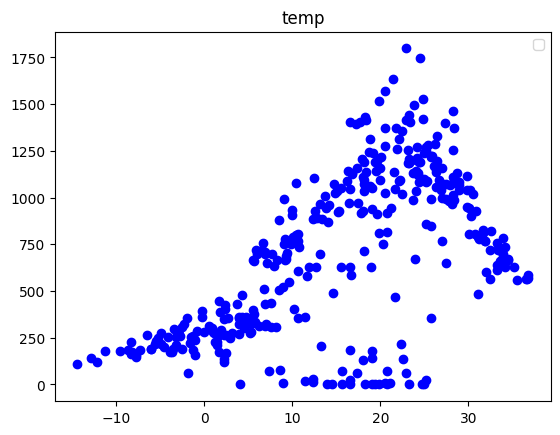

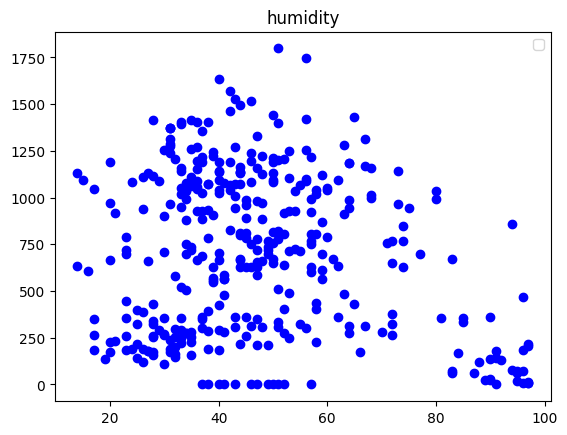

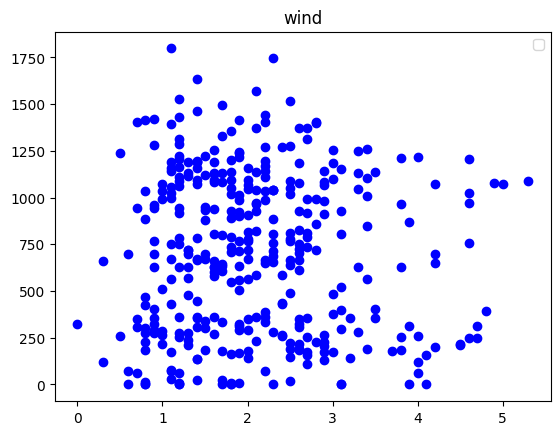

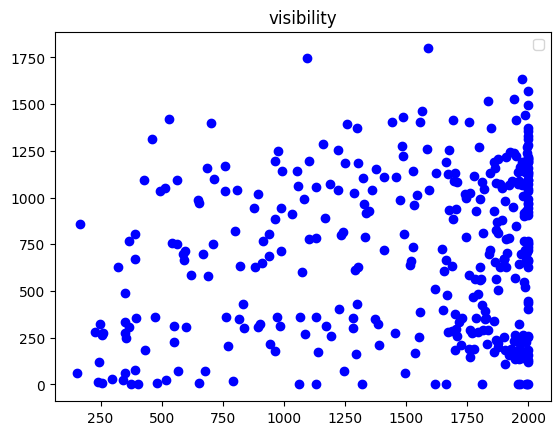

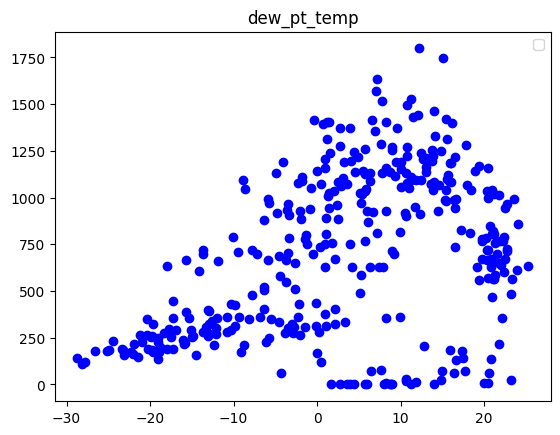

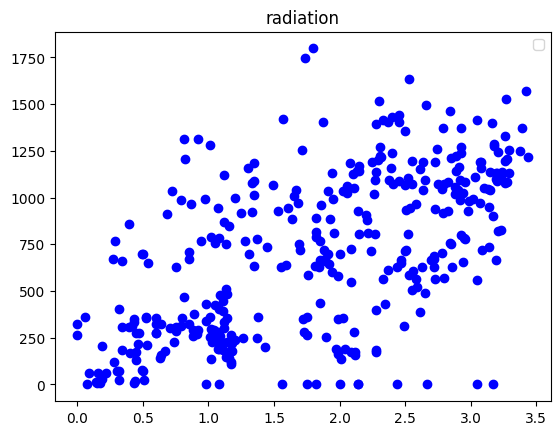

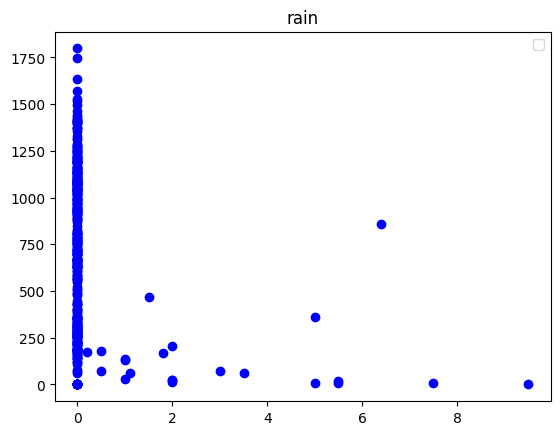

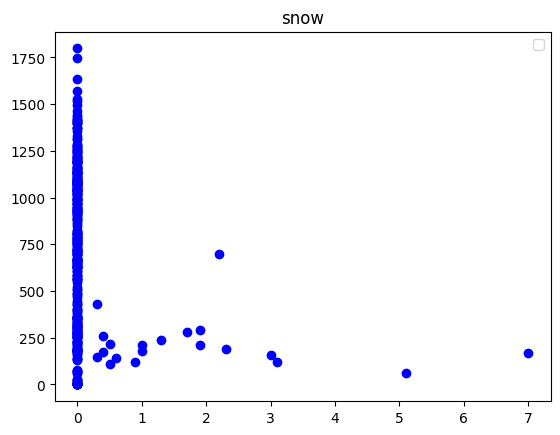

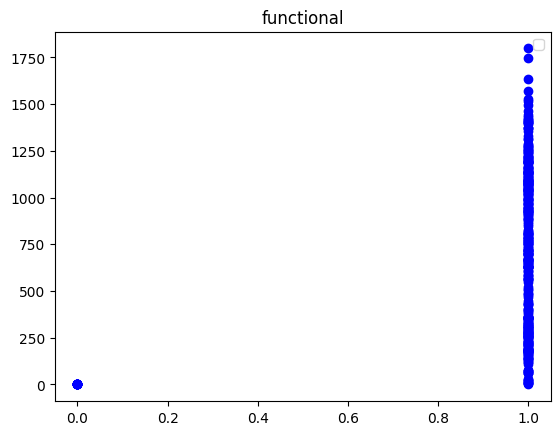

In [7]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"],color='blue')
  plt.title(label)
  plt.legend()
  plt.show()

In [72]:
df.drop(["wind","visibility","functional"],axis=1)

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0
...,...,...,...,...,...,...,...
8652,752,9.1,57,1.0,1.69,0.0,0.0
8676,672,9.3,61,2.1,0.85,0.0,0.0
8700,635,7.9,14,-18.0,1.81,0.0,0.0
8724,661,5.6,27,-11.9,0.34,0.0,0.0


In [73]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [74]:
def divide (dataframe,y_label,x_label=None):
  df = copy.deepcopy(dataframe)
  if x_label is None:
    x = df[[c for c in df.columns if c != y_label]].values
  else:
      if len(x_label) ==1 :
        x= df[x_label[0]].values.reshape(-1,1)
      else:
        x= df[x_label].values
  y = df[y_label].values.reshape(-1,1)

  data = np.hstack((x,y))

  return data,x,y

In [39]:
train,x_train,y_train = divide(train,"bike_count",x_label=["temp"])
valid,x_valid,y_valid = divide(valid,"bike_count",x_label=["temp"])
test,x_test,y_test = divide(test,"bike_count",x_label=["temp"])

In [12]:
#Linear Regression Model
lr_model = LinearRegression()
lr_model = lr_model.fit(x_train,y_train)

In [13]:
lr_model.score(x_test,y_test)

0.338354315148649

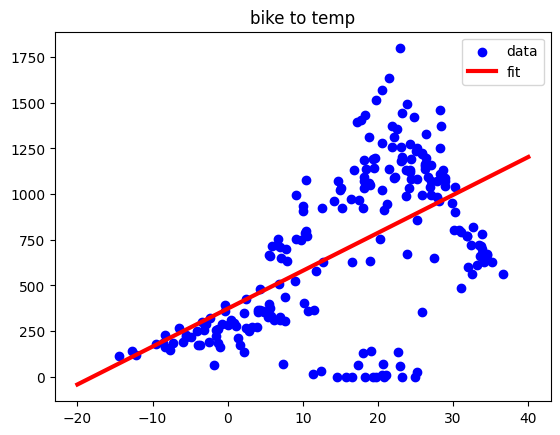

In [14]:
plt.scatter(x_train,y_train,color='blue',label='data')
line = tf.linspace(-20,40,100)
plt.plot(line,lr_model.predict(np.array(line).reshape(-1,1)),color='red',label='fit',linewidth=3)
plt.title('bike to temp')
plt.legend()
plt.show()

In [75]:
#All Data Linear Regression
train,x_train,y_train = divide(train,"bike_count",x_label=df.columns[1:])
valid,x_valid,y_valid = divide(valid,"bike_count",x_label=df.columns[1:])
test,x_test,y_test = divide(test,"bike_count",x_label=df.columns[1:])

In [57]:
#Linear Regression Model
lr_model = LinearRegression()
lr_model = lr_model.fit(x_train,y_train)

In [ ]:
lr_model.score(x_test,y_test)

0.6158711122553621

In [ ]:
lr_model.predict(x_test)

array([[ 220.17558691],
       [ 431.84055281],
       [ 753.03949854],
       [1088.04701567],
       [ 752.46773953],
       [ 503.47065079],
       [ 526.84577231],
       [ 383.21629469],
       [ 393.53939944],
       [1028.40593034],
       [1033.73565395],
       [  47.85391427],
       [ 407.17852575],
       [ 289.21780614],
       [ 125.45907368],
       [ 344.43534901],
       [ 338.45030522],
       [1117.21294807],
       [ 697.00202163],
       [ 764.55851893],
       [ 662.63562493],
       [ 781.7903269 ],
       [ 476.66184565],
       [ 802.13098321],
       [1212.95794837],
       [1106.43306543],
       [ 950.86854583],
       [ 839.34029936],
       [1080.32416267],
       [1157.53735102],
       [ 893.40447135],
       [ 646.9620549 ],
       [1228.27433556],
       [ -54.19906887],
       [ 721.23092501],
       [ 582.5104178 ],
       [ 595.40530546],
       [1041.4533949 ],
       [1148.71633499],
       [-195.97825461],
       [ 573.76293884],
       [ 997.854

In [42]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
# Regression With NN
Norm = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
Norm.adapt(x_train.reshape(-1))

NN_model = tf.keras.Sequential([
    Norm,
    tf.keras.layers.Dense(1)
])

NN_model.compile(optimizer = tf.keras.optimizers.Adam(0.1),loss='mean_squared_error')

In [ ]:
history = NN_model.fit(x_train.reshape(-1),y_train,epochs=1000,validation_data=(x_valid,y_valid))

Epoch 1/1000
7/7 [==============================] - 1s 34ms/step - loss: 713028.3125 - val_loss: 567290.3750
Epoch 2/1000
7/7 [==============================] - 0s 10ms/step - loss: 711654.3125 - val_loss: 566156.8750
Epoch 3/1000
7/7 [==============================] - 0s 10ms/step - loss: 710320.5000 - val_loss: 565023.9375
Epoch 4/1000
7/7 [==============================] - 0s 10ms/step - loss: 708973.0000 - val_loss: 563901.0000
Epoch 5/1000
7/7 [==============================] - 0s 8ms/step - loss: 707599.7500 - val_loss: 562792.8125
Epoch 6/1000
7/7 [==============================] - 0s 7ms/step - loss: 706275.0625 - val_loss: 561681.9375
Epoch 7/1000
7/7 [==============================] - 0s 10ms/step - loss: 704990.8125 - val_loss: 560557.6250
Epoch 8/1000
7/7 [==============================] - 0s 10ms/step - loss: 703636.8125 - val_loss: 559446.5625
Epoch 9/1000
7/7 [==============================] - 0s 8ms/step - loss: 702323.5625 - val_loss: 558333.6875
Epoch 10/1000
7/7 [===

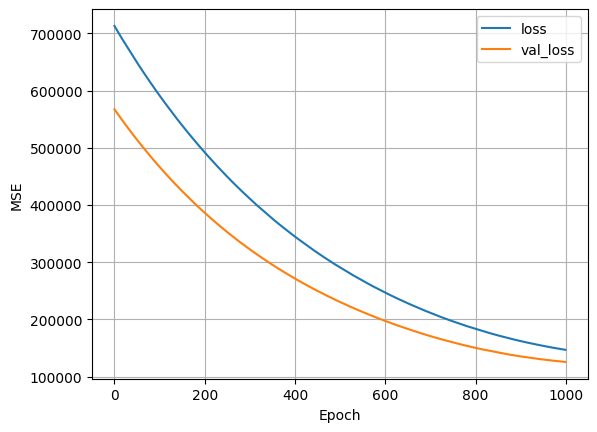

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


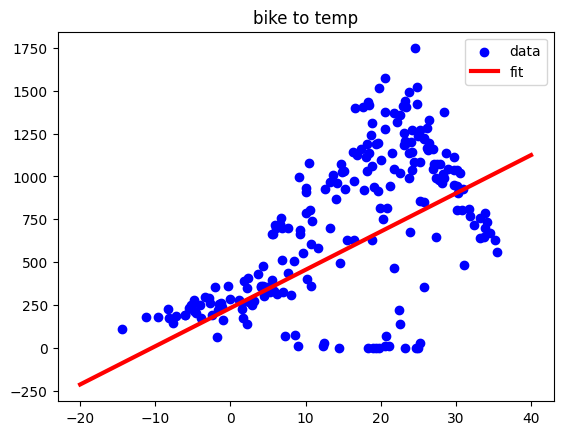

In [ ]:
plt.scatter(x_train,y_train,color='blue',label='data')
line = tf.linspace(-20,40,100)
plt.plot(line,NN_model.predict(np.array(line).reshape(-1,1)),color='red',label='fit',linewidth=3)
plt.title('bike to temp')
plt.legend()
plt.show()

In [47]:
# Deep NN for Regression
Norm = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
Norm.adapt(x_train.reshape(-1))

NN_model = tf.keras.Sequential([
    Norm,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])

NN_model.compile(optimizer = tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')

In [48]:
history = NN_model.fit(x_train,y_train,epochs=1000,validation_data=(x_valid,y_valid))

Epoch 1/1000
7/7 [==============================] - 1s 32ms/step - loss: 673260.6250 - val_loss: 639687.3125
Epoch 2/1000
7/7 [==============================] - 0s 9ms/step - loss: 673071.0625 - val_loss: 639503.8750
Epoch 3/1000
7/7 [==============================] - 0s 7ms/step - loss: 672867.1875 - val_loss: 639270.9375
Epoch 4/1000
7/7 [==============================] - 0s 9ms/step - loss: 672608.3125 - val_loss: 638967.1250
Epoch 5/1000
7/7 [==============================] - 0s 7ms/step - loss: 672264.3125 - val_loss: 638573.8750
Epoch 6/1000
7/7 [==============================] - 0s 11ms/step - loss: 671813.5000 - val_loss: 638041.0625
Epoch 7/1000
7/7 [==============================] - 0s 7ms/step - loss: 671189.7500 - val_loss: 637317.9375
Epoch 8/1000
7/7 [==============================] - 0s 7ms/step - loss: 670351.5625 - val_loss: 636369.7500
Epoch 9/1000
7/7 [==============================] - 0s 9ms/step - loss: 669296.7500 - val_loss: 635131.3750
Epoch 10/1000
7/7 [=======

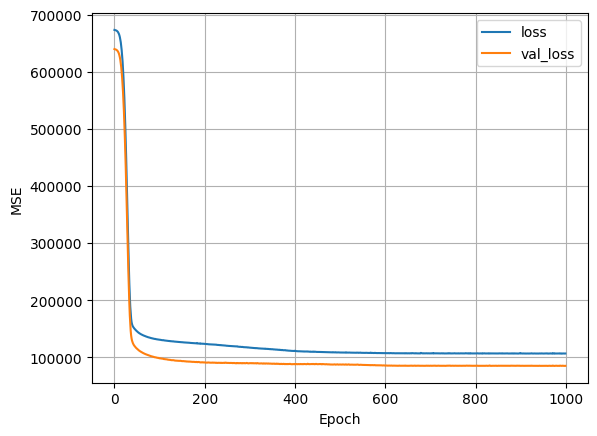

In [49]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


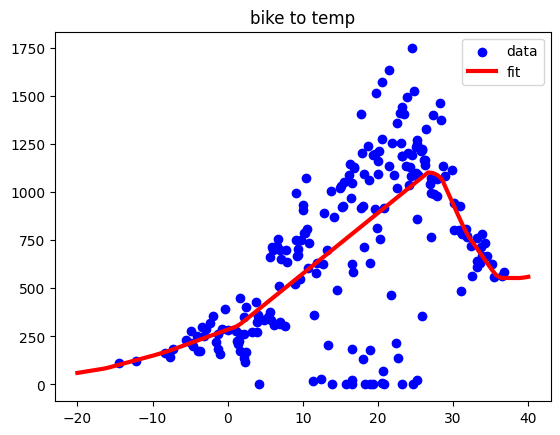

In [50]:
plt.scatter(x_train,y_train,color='blue',label='data')
line = tf.linspace(-20,40,100)
plt.plot(line,NN_model.predict(np.array(line).reshape(-1,1)),color='red',label='fit',linewidth=3)
plt.title('bike to temp')
plt.legend()
plt.show()

In [84]:
Norm = tf.keras.layers.Normalization(input_shape=(9,),axis=-1)
Norm.adapt(x_train)


In [85]:
# Deep NN for Regression

NN_model_all = tf.keras.Sequential([
    Norm,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])

NN_model_all.compile(optimizer = tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')

In [86]:
history = NN_model_all.fit(x_train,y_train,epochs=1000,validation_data=(x_valid,y_valid))

Epoch 1/1000
7/7 [==============================] - 1s 42ms/step - loss: 672888.3125 - val_loss: 657067.5000
Epoch 2/1000
7/7 [==============================] - 0s 10ms/step - loss: 672576.5000 - val_loss: 656766.1875
Epoch 3/1000
7/7 [==============================] - 0s 12ms/step - loss: 672258.1875 - val_loss: 656407.7500
Epoch 4/1000
7/7 [==============================] - 0s 13ms/step - loss: 671875.4375 - val_loss: 655944.5625
Epoch 5/1000
7/7 [==============================] - 0s 12ms/step - loss: 671357.3750 - val_loss: 655323.3750
Epoch 6/1000
7/7 [==============================] - 0s 11ms/step - loss: 670661.9375 - val_loss: 654470.8750
Epoch 7/1000
7/7 [==============================] - 0s 9ms/step - loss: 669707.3750 - val_loss: 653288.3750
Epoch 8/1000
7/7 [==============================] - 0s 11ms/step - loss: 668369.2500 - val_loss: 651629.5625
Epoch 9/1000
7/7 [==============================] - 0s 9ms/step - loss: 666507.2500 - val_loss: 649294.0000
Epoch 10/1000
7/7 [==

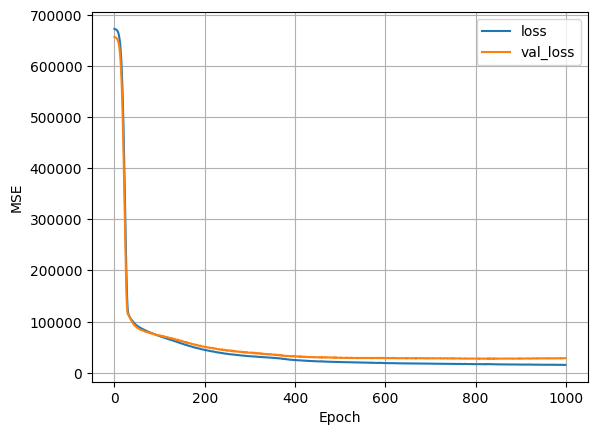

In [87]:
plot_loss(history)

In [94]:
# Calc. MSE
y_pred_lr = lr_model.predict(x_test)
y_pred_NN = NN_model_all.predict(x_test)

3/3 [==============================] - 0s 3ms/step


In [97]:
def MSE (y_pred,y_real):
  return (np.square(y_pred-y_real)).mean()

In [99]:
MSE(y_pred_lr,y_test)


74720.25963527053

In [100]:
MSE(y_pred_NN,y_test)

23585.864819160764

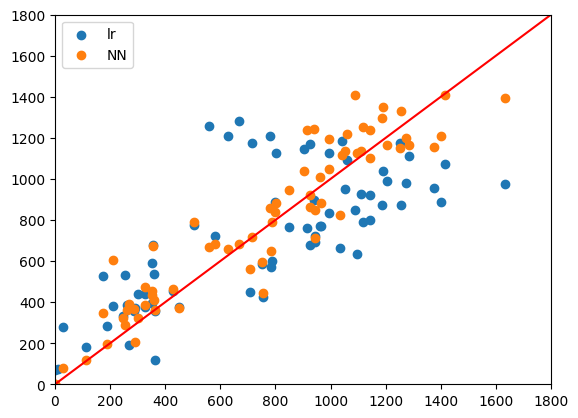

In [103]:
plt.scatter(y_test,y_pred_lr,label='lr')
plt.scatter(y_test,y_pred_NN,label='NN')
lims = [0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_=plt.plot(lims,lims,c='red')